In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

train_df = pd.read_csv("train.csv").drop(columns='Unnamed: 0')
train_labels = train_df['label'].values
train_features = train_df.drop(columns='label').values

val_df = pd.read_csv("val.csv")
val_labels = val_df['label'].values
val_features = val_df.drop(columns='label').values

test_df = pd.read_csv('test.csv',header = None)
test_features = test_df.values

Data Loaded


In [11]:
#Training the uncropped images with Gaussian
gaussian = GaussianNB()
GaussianNB(priors=None)
gaussian.fit(train_features, train_labels)
gNC_pred = gaussian.predict(test_features)

print(gaussian.score(val_features, val_labels))

temp = gNC_pred.astype(int)
print(temp)

img_id = np.arange(0,20000)
print(img_id)

d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_1.csv", index = None)

print("finished")


0.5535
[6 9 3 ... 8 9 6]
[    0     1     2 ... 19997 19998 19999]
finished


In [13]:
#Training the uncropped images with Bernoulli
bernoulli = BernoulliNB()
bNC_fit = bernoulli.fit(train_features, train_labels)
bNC_pred = bNC_fit.predict(test_features)
print(bNC_fit.score(val_features, val_labels))

temp = bNC_pred.astype(int)
img_id = np.arange(0,20000)

d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_2.csv", index = None)

print("finished")


0.833
finished


In [ ]:
#Random forest 10,4 untouched
clf1 = RandomForestClassifier(max_depth=4, random_state=10)
clf1.fit(train_features, train_labels)
clf1_pred = clf1.predict(test_features)

temp = clf1_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_5.csv", index = None)


#10,16 untouched index = 7
clf2 = RandomForestClassifier(max_depth=16, random_state=10)
clf2.fit(train_features, train_labels)
clf2_pred = clf2.predict(test_features)

temp = clf2_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_7.csv", index = None)

#depth 4 tree 30, untouched index = 9
clf3 = RandomForestClassifier(max_depth=4, random_state=30)
clf3.fit(train_features, train_labels)
clf3_pred = clf3.predict(test_features)

temp = clf3_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_9.csv", index = None)


#depth 16 tree 30, untouched index = 9
clf4 = RandomForestClassifier(max_depth=16, random_state=30)
clf4.fit(train_features, train_labels)
clf4_pred = clf4.predict(test_features)

temp = clf4_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_11.csv", index = None)



In [ ]:
#Random forest 10,4 untouched
clf5 = RandomForestClassifier(max_depth=4, random_state=10)
clf5.fit(train_features, train_labels)
clf5_pred = clf5.predict(test_features)

temp = clf5_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_6.csv", index = None)


#10,16 untouched index = 7
clf6 = RandomForestClassifier(max_depth=16, random_state=10)
clf6.fit(train_features, train_labels)
clf6_pred = clf6.predict(test_features)

temp = clf6_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_8.csv", index = None)

#depth 4 tree 30, untouched index = 9
clf7 = RandomForestClassifier(max_depth=4, random_state=30)
clf7.fit(train_features, train_labels)
clf7_pred = clf7.predict(test_features)

temp = clf7_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_10.csv", index = None)


#depth 16 tree 30, untouched index = 9
clf8 = RandomForestClassifier(max_depth=16, random_state=30)
clf8.fit(train_features, train_labels)
clf8_pred = clf8.predict(test_features)

temp = clf8_pred.astype(int)
img_id = np.arange(0,20000)
d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_12.csv", index = None)

(48000, 400)


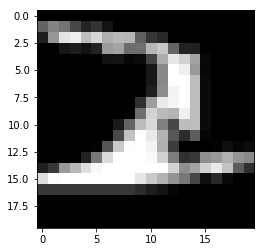

In [3]:
#Crop the test features and the train features 
from skimage.transform import resize
cropped_images = np.ones((train_features.shape[0], 400))

for itr in range(train_features.shape[0]):
    curr_img = train_features[itr, :]
    img_matrix = curr_img.reshape([28,28])

    row_bounds = np.where(img_matrix > 0)[0]
    col_bounds = np.where(img_matrix > 0)[1]
    max_row_diff = max(row_bounds) - min(row_bounds)
    max_col_diff = max(col_bounds) - min(col_bounds)

    start_with_row = False
    if max_row_diff > max_col_diff:
        max_bound = max_row_diff
        start_with_row = True
    else:
        max_bound = max_col_diff


    if start_with_row:
        crop_img = img_matrix[row_bounds[0]:row_bounds[0] + max_row_diff, 0:27]
        scaled = resize(crop_img, (20, 20), preserve_range = True, mode = 'constant')
        plt.imshow(scaled, cmap = 'gray')
        cropped_images[itr] = scaled.flatten()

    else:
        crop_img = img_matrix[0 : 27, col_bounds[0]:col_bounds[0] + max_col_diff]
        scaled = resize(crop_img, (20, 20), preserve_range = True, mode = 'constant')
        plt.imshow(scaled, cmap = 'gray')
        cropped_images[itr] = scaled.flatten()

print(cropped_images.shape)   



In [ ]:
#Process the test features for classification
test_features_new = np.ones((test_features.shape[0], 400))

for itr in range(test_features.shape[0]):
    curr_img = test_features[itr, :]
    img_matrix = curr_img.reshape([28,28])

    row_bounds = np.where(img_matrix > 0)[0]
    col_bounds = np.where(img_matrix > 0)[1]
    max_row_diff = max(row_bounds) - min(row_bounds)
    max_col_diff = max(col_bounds) - min(col_bounds)

    start_with_row = False
    if max_row_diff > max_col_diff:
        max_bound = max_row_diff
        start_with_row = True
    else:
        max_bound = max_col_diff


    if start_with_row:
        crop_img = img_matrix[row_bounds[0]:row_bounds[0] + max_row_diff, 0:27]
        scaled = resize(crop_img, (20, 20), preserve_range = True, mode = 'constant')
        plt.imshow(scaled, cmap = 'gray')
        test_features_new[itr] = scaled.flatten()

    else:
        crop_img = img_matrix[0 : 27, col_bounds[0]:col_bounds[0] + max_col_diff]
        scaled = resize(crop_img, (20, 20), preserve_range = True, mode = 'constant')
        plt.imshow(scaled, cmap = 'gray')
        test_features_new[itr] = scaled.flatten()

print(test_features_new.shape)

In [ ]:
#Train the gaussian after cropping
gaussian = GaussianNB()
GaussianNB(priors=None)
gaussian.fit(cropped_images, train_labels)

gaussian_pred = gaussian.predict(test_features_new)
#print(gaussian.score(val_features, val_labels))

temp = gaussian_pred.astype(int)
img_id = np.arange(0,20000)

d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_3.csv", index = None)


In [ ]:
#Train the Bernoulli after cropping
bernoulli = BernoulliNB()
bernoulli.fit(cropped_images, train_labels)
bNC_pred = bernoulli.predict(test_features_new)

temp = bNC_pred.astype(int)
img_id = np.arange(0,20000)

d = {'ImageId': img_id, 'Label': temp}
df = pd.DataFrame(data=d)
df.to_csv("hqiu9_4.csv", index = None)